# Modelling : K Nearest Neighbours 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [6]:
data = pd.read_csv('cleaned_data.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [14]:
X = data.iloc[: , :-1]
y = data.iloc[: , -1]

**Using same random state as logistic regression**

In [127]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 12 , train_size = 0.8)

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

**BASELINE MODEL**

In [132]:
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()
knn.fit(X_train , y_train)

Xtrain_pred = knn.predict(X_train)
print("Train Accuracy : " , accuracy_score(y_train , Xtrain_pred))

Xtest_pred = knn.predict(X_test)
print("Test Accuracy : " , accuracy_score(y_test , Xtest_pred))

print("CV_Score : " ,cross_val_score( knn , X_train , y_train , cv = 5 , scoring = 'accuracy' ).mean())

Train Accuracy :  0.7615062761506276
Test Accuracy :  0.6333333333333333
CV_Score :  0.6069148936170212


**Fine tune model**

In [156]:
estimator = KNeighborsClassifier()
params_grid = {'n_neighbors' : list(range(1,50))}

knn_model = GridSearchCV(estimator , params_grid , cv = 5 , scoring = 'accuracy')
knn_model.fit(X_train , y_train)
knn_model.best_params_

{'n_neighbors': 32}

**Evaluation**

In [143]:
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=32)
knn.fit(X_train , y_train)

Xtrain_pred = knn.predict(X_train)
print("Train Accuracy : " , accuracy_score(y_train , Xtrain_pred))

Xtest_pred = knn.predict(X_test)
print("Test Accuracy : " , accuracy_score(y_test , Xtest_pred))

print("CV_Score : " ,cross_val_score( knn , X_train , y_train , cv = 5 , scoring = 'accuracy' ).mean())

Train Accuracy :  0.6861924686192469
Test Accuracy :  0.65
CV_Score :  0.6861702127659575


**Confusion Matrix**

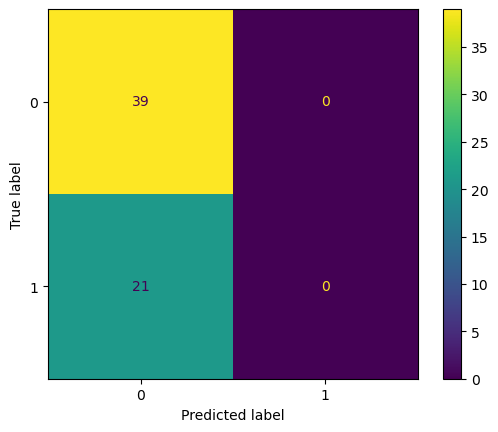

In [146]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
cm = confusion_matrix(y_test , Xtest_pred)
ConfusionMatrixDisplay(cm , display_labels = [0,1]).plot()
plt.show()

**ROC CURVE**

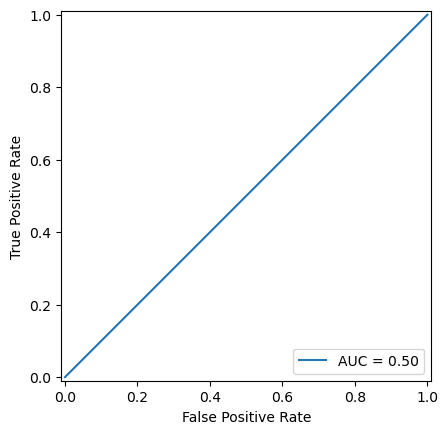

In [151]:
from sklearn.metrics import roc_curve , auc , RocCurveDisplay
fpr , tpr , threshold = roc_curve(y_test , Xtest_pred)
roc_auc = auc(fpr , tpr)
RocCurveDisplay(fpr = fpr , tpr = tpr , roc_auc  = roc_auc).plot()
plt.show()

**Trying**

In [158]:
best_param ,train , test , cv = [] , [] , [] , []
for r in range(1,50):
    X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = r , train_size = 0.8)
    estimator = KNeighborsClassifier()
    params_grid = {'n_neighbors' : list(range(1,50))}

    knn_model = GridSearchCV(estimator , params_grid , cv = 5 , scoring = 'accuracy')
    knn_model.fit(X_train , y_train)
    best_param.append(knn_model.best_params_)

    knn = KNeighborsClassifier(n_neighbors=32)
    knn.fit(X_train , y_train)

    Xtrain_pred = knn.predict(X_train)
    train.append(accuracy_score(y_train , Xtrain_pred))

    Xtest_pred = knn.predict(X_test)
    test.append(accuracy_score(y_test , Xtest_pred))

    cv.append(cross_val_score( knn , X_train , y_train , cv = 5 , scoring = 'accuracy' ).mean())


TypeError: list indices must be integers or slices, not str

In [174]:
acc = pd.DataFrame({'Best param' : best_param , 'Train' : train , 'Test' : test , 'CV' : cv})

In [182]:
acc[(abs(acc['Train'] - acc['Test']) <= 0.04) & (abs(acc['Train'] - acc['CV']) <= 0.04) & (abs(acc['CV'] - acc['Test']) <= 0.04)]

,Best param,Train,Test,CV
2,24,0.682008,0.666667,0.682004
3,12,0.673640,0.700000,0.669504
11,32,0.686192,0.650000,0.686170
12,15,0.673640,0.700000,0.673670
19,16,0.677824,0.683333,0.677837
22,14,0.673640,0.700000,0.673670
24,22,0.686192,0.650000,0.686170
25,22,0.677824,0.683333,0.677837
26,4,0.682008,0.666667,0.682004
27,17,0.673640,0.700000,0.673670
